# 01_ZTM_PyTorch WorkFlow

Let's explore an example PyTorch end-to-end workflow.

Resoruces:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of the notebook: https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
what_were_covering = { 1 : "data (preparing and loading)",
                       2 : "build model",
                       3 : "fitting the model to data (training)",
                       4 : "making predictions and evaluate a model (inference)",
                       5 : "saving and loading a model",
                       6 : "putting all together"}
what_were_covering

{1: 'data (preparing and loading)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluate a model (inference)',
 5: 'saving and loading a model',
 6: 'putting all together'}

In [2]:
import torch
from torch import nn # nn Contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Check PyTorch version
print(torch.__version__)

2.2.1+cu121


## 1. Data (Preparing and loading)
Data can be almost anything.. in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data..)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters.**

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 torch.Size([50, 1]))

In [4]:
y[:10], y.shape

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  """
  Plots the training data, test data and compares predictions.
  """
  plt.figure(figsize = (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training data')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Testing data')

  # Are there prediction?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c = 'r', s = 4 , label = 'Predictions')

  # Show the legend
  plt.legend(prop = {'size': 14});

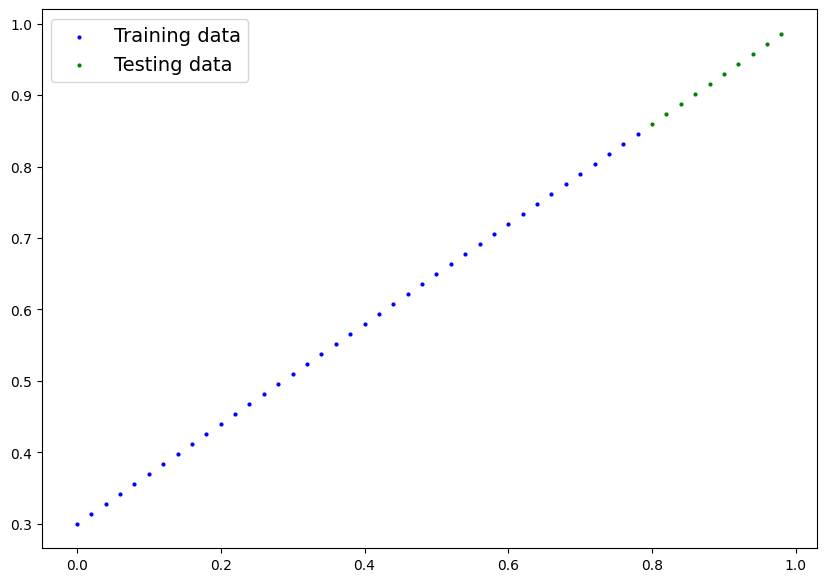

In [7]:
plot_predictions();

## 2. Build Model

Our first PyTorch model!

This is very exciting.. let's do it..!

What our model does?

* Start with random values of weight and bias.
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data).

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

* **def forward(self, x: torch.Tensor):** This declares a method named forward that takes two parameters:
* **self:** This is a reference to the instance of the class itself. It is used to access variables or methods that belong to the class.
* **x:** This is an input tensor (torch.Tensor) that the neural network will process.
* **-> torch.Tensor:** This specifies the return type of the method. It indicates that the method will return a tensor (torch.Tensor) after processing the input.

#### **nn.Parameter**

In PyTorch, nn.Parameter is a class that is used to define parameters (tensors) that are learnable during the training process of a neural network. When you create an instance of nn.Parameter, it automatically registers the tensor as a parameter of the module, making it accessible to the optimizer for updating during training.

Here's what nn.Parameter does:

**Automatic Registration:** When you create an instance of nn.Parameter, it automatically registers the tensor as a parameter of the module. This means that the tensor will be included in the list of parameters that the optimizer will update during the training process.

**Gradient Tracking:** nn.Parameter tensors have requires_grad attribute set to True by default. This means that gradients with respect to these parameters will be computed during the backward pass, allowing for automatic differentiation and gradient-based optimization.

**Integration with Optimizers:** Since nn.Parameter tensors are automatically registered as parameters of the module, they are seamlessly integrated with PyTorch optimizers. This allows you to update the parameters using various optimization algorithms such as Stochastic Gradient Descent (SGD), Adam, RMSprop, etc.

Because we inherited nn.Module class we need to set up our own forward pass method.

In [8]:
# Create linear rergession model class
class LinearRegressionModel(nn.Module): # <- almost everything  in PyTorch inherits from nn.Module (Just tf.keras.Layers in tensorflow)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- Start with a random weight and try to adjust it to the ideal weight
                                            requires_grad = True, # default True: Can this parameter be updated via gradient descent?
                                            dtype = torch.float)) # default float32: <- PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.randn(1, # <- Start with a random weight and try to adjust it to the ideal weight
                                         requires_grad = True, # default True: Can this parameter be updated via gradient descent?
                                         dtype = torch.float)) # default float32: <- PyTorch loves the datatype torch.float32

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula

### PyTorch model building essentials

* **torch.nn -** contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)
* **torch.nn.Parameter -**  what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* **torch.nn.Module -** The base class for all neural network modules, if you subclass it, you should overwrite forward().
* **torch.optim -** this is where the optimizers in PyTorch live, they will help with gradient descent.
* **def forward() -** All nn.Module subclasses require you to overwrite forward(), Thismethod describes what happens in the forward computations.
* **torch.utils.data.Dataset -** Represents a map between key(label) and sample (features) pairs of your data. Such as images and their associated labels.
* **torch.utils.data.DataLoader -** Creates a Python iterable over a torch Dataset(allows you to iterate over your data).

### Checking the contents of our PyTorch model

Now we've created a model, let's see what what's inside.

So we can check out our model parameters or what's inside our model using `.parameters().`

In [9]:
# Create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Predictions using `torch.inference_model()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model it's going to run it through the forward method.

**with torch.inference_mode():** This line of code enters a context where inference mode is enabled. Inference mode is a mode in PyTorch where certain operations, such as dropout and batch normalization, behave differently compared to training mode. In inference mode, dropout layers are disabled, and batch normalization layers use precomputed running statistics instead of batch statistics.

**y_preds = model_0(X_test):** Within the inference mode context, this line of code makes predictions using the model (model_0) on the test dataset (X_test). It passes the test dataset (X_test) through the model (model_0) to obtain the predicted output (y_preds).

In [11]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [12]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# OR You can also do something similar to torch.no_grad
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

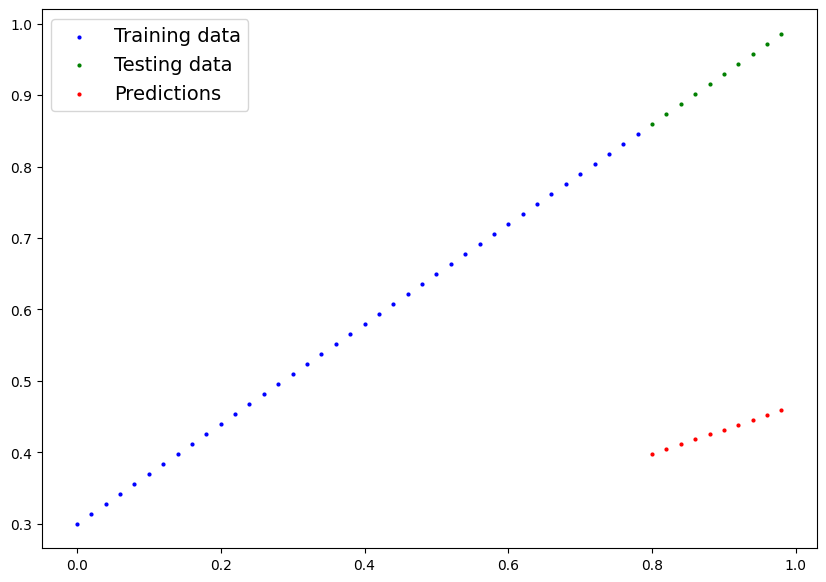

In [14]:
plot_predictions(predictions = y_preds)

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models prediction are is to use loss functions.

* Note: Loss function may also be called cost function or criterion in diffrent case. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss Function**: A function to measure how wrong your model's predictions are to the ideal outputs, lower the better.

* **Optimizer** :  Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case to improve the loss function and specifically for PyTorch we need a training loop and a testing loop). https://pytorch.org/docs/stable/optim.html

 - Inside the optimizer you'll often have to set parameters:
   * `params` - The model parameters you'd like to optimize, for example `params = model_0.parameters()`
   * `lr` (learning rate) -  the learning rate is a hyperparameter that defines howbig/small the optimizer changes the parameters with each step( a small `lr` results in small changes, a large `lr` results in large changes).

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
# Check out the models parameters ( a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an Optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(), # what parameters of the model needs to be improved
                            lr = 0.01) # Learning rate = possibly the most important hyperparameter you can set.

## Building a training loop (and a testing loop) in PyTorch

A couple of thing we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on the data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss Backward - move backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backporpagation**)
5. Optimizer step - use the Optimizer to adjust our model parameters to try and improve the loss. (**gradient Descent**)                                  
                 

In [18]:
with torch.no_grad():
  param = list(model_0.parameters())

param

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### **`Zeroing the Optimizer Gradients`**

Zeroing the optimizer gradients before each epoch is a crucial step in the training process to ensure that the gradients are calculated correctly for each batch and that they don't accumulate over multiple iterations. Here's why PyTorch zeros the optimizer gradients at the beginning of each epoch:

**Accumulation of Gradients:** During backpropagation, gradients are computed for each parameter based on the loss function and the current input data. If gradients were not zeroed before each epoch, the gradients from the previous epoch would accumulate with the gradients computed in the current epoch. This accumulation could lead to incorrect updates of the model parameters and affect the training process negatively.

**Consistent Updates:** Zeroing the gradients ensures that the optimizer starts with a clean slate for each batch or epoch. It helps maintain consistency in the training process and ensures that each parameter update is based only on the gradients computed from the current batch of data.

**Preventing Stale Gradients:** Stale gradients, i.e., gradients that are outdated or no longer relevant, can occur if gradients are not zeroed before each epoch. By zeroing the gradients, PyTorch ensures that only the gradients computed from the most recent forward pass are used for parameter updates.

**Avoiding Memory Issues:** Accumulating gradients over multiple epochs can lead to memory issues, especially when training on large datasets or with complex models. Zeroing the gradients helps prevent excessive memory usage by clearing the gradients from memory after each parameter update.

In summary, zeroing the optimizer gradients before each epoch helps maintain the correctness and stability of the training process, prevents accumulation of stale gradients, and avoids memory issues during training.

In [20]:
torch.manual_seed(42)

# An epoch is one loop through the data.. ( this is a hyperparameter because we set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # Train mode in PyTorch sets all parameters that require gradients

  # 1. Forward pass on the training data using the forward() method inside
  y_pred = model_0(X_train)

  # 2. Calculate the loss (how different are the model's predictions to the true values)
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  # Optimizer zero gradients of the optimizer (they accumulate by default)
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so.. we have to zero them above in step 3 for the nest iteration of the loop

  ### Testing
  model_0.eval() # Turns off different setting in the model not needed for evaluation/testing (dropout, batchnorm layers)

  # Gradient tracking is not needed in inference
  with torch.inference_mode(): # Turns off gradient tracking & a couple more things behind the scenes
  # with torch.no_grad(): # you may also see torch.no_grad() in PyTorch older versions
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss}")

    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Test: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Test: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Test: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Test: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Test: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Test: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Test: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

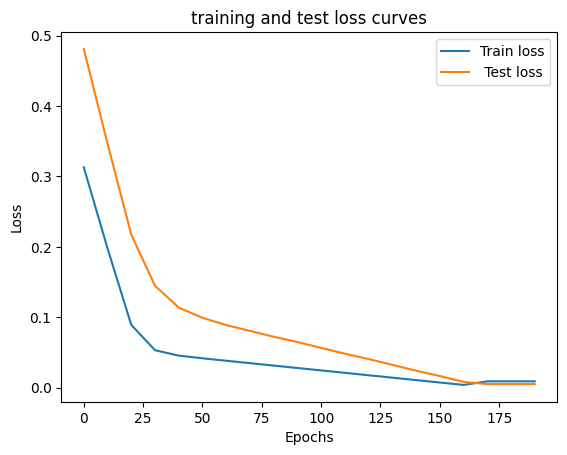

In [21]:
# Plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label = 'Train loss')
plt.plot(epoch_count, test_loss_values, label = ' Test loss')
plt.title("training and test loss curves")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [23]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

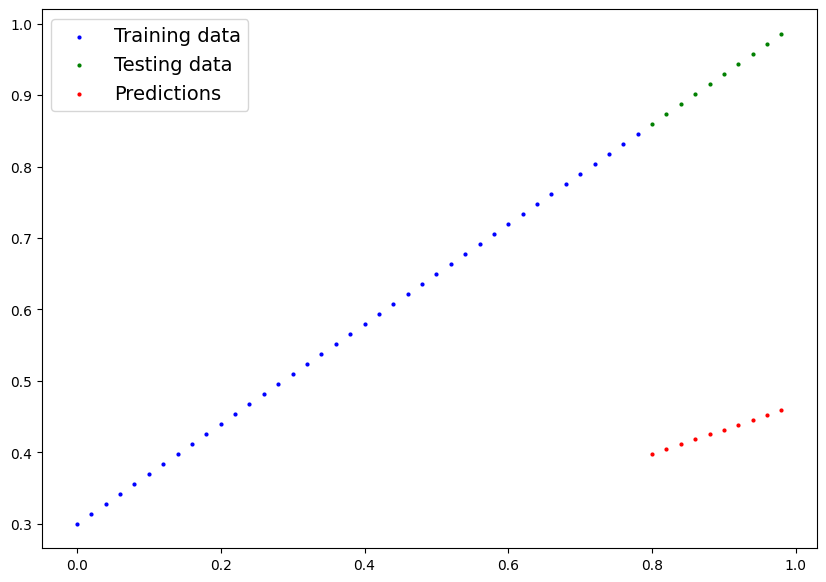

In [24]:
plot_predictions(predictions = y_preds)

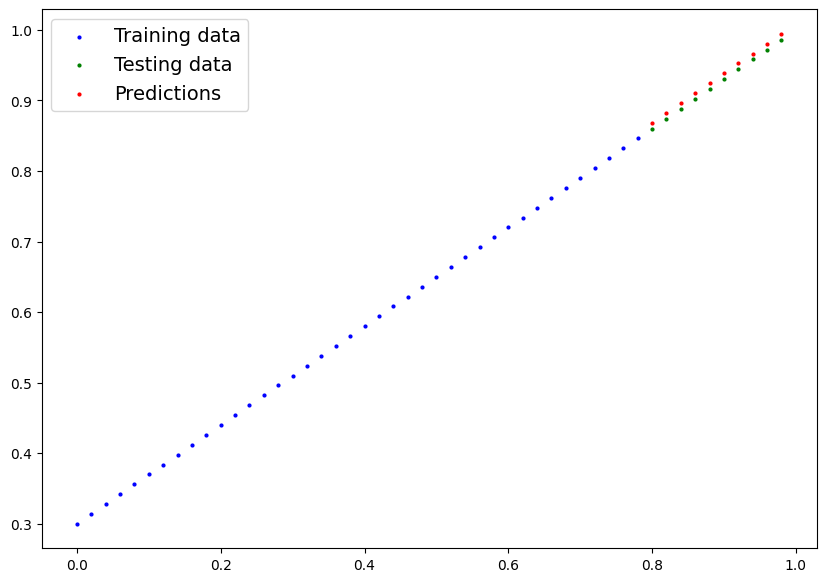

In [25]:
plot_predictions(predictions = y_preds_new)

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch:
1. `torch.save()` - allows you save a PyTorch object in python's pickle format
2. `torch.load()` -  allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

PyTorch save & load code tutorial : https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [26]:
# Saving our pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH =  Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME =  "01_pytorch_workflow_model_0.pth" # A common PyTorch convention is to save models using wither a .pt or .pth file extension
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model model_0.state_dict() - PyTorch recommended way
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth


In [27]:
! ls -l models

total 4
-rw-r--r-- 1 root root 1680 Apr 20 15:40 01_pytorch_workflow_model_0.pth


## Loading a PyTorch Model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
# To load in a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [30]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [31]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [32]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [33]:
# Compare loaded model preds with the original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through steps above and see it all in one place

In [34]:
# Import PyTorch and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)

2.2.1+cu121


Create device agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [36]:
# Setup device agnostic code
device  = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cpu


### 6.1 Data

In [42]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.8
bias = 0.4

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4160],
         [0.4320],
         [0.4480],
         [0.4640],
         [0.4800],
         [0.4960],
         [0.5120],
         [0.5280],
         [0.5440]]))

In [43]:
# Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [44]:
# Plot the data
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  """
  Plots the training data, test data and compares predictions.
  """
  plt.figure(figsize = (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training data')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Testing data')

  # Are there prediction?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c = 'r', s = 4 , label = 'Predictions')

  # Show the legend
  plt.legend(prop = {'size': 14});

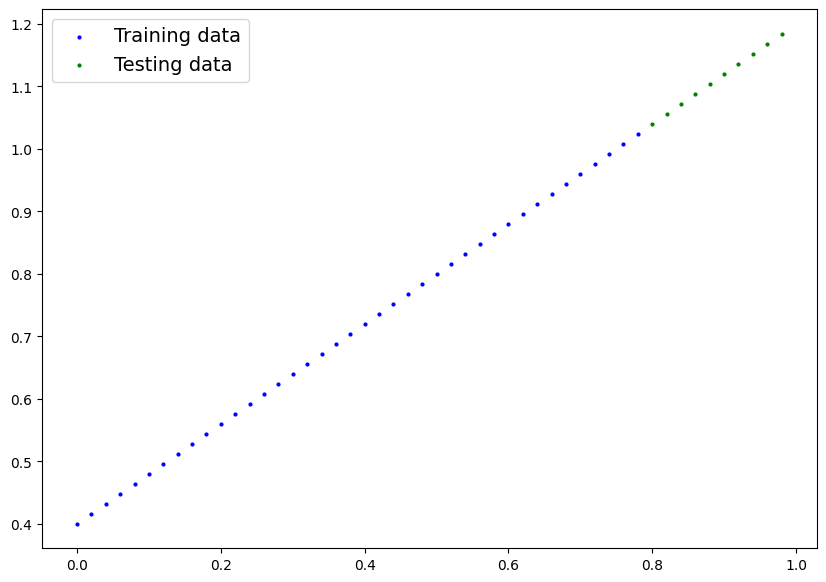

In [45]:
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear Model

In [46]:
# Create a linear model by subclassing nn.Module
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           dtype = torch.float,
                                           requires_grad = True))

    self.bias = nn.Parameter(torch.randn(1,
                                         dtype = torch.float,
                                         requires_grad = True))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [47]:
model = LinearRegression()
model

LinearRegression()

In [ ]:
with torch.inference_mode():
  y_preds = model(X_train)

Creating a Linear model using the predefined linear layer in `torch.nn.Linear`.

In [69]:
# Create a Linear regression model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)

# Initialize the model
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [70]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [71]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [72]:
# Setup the loss function
loss_function = nn.L1Loss() # same as MAE

# Setup the optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [73]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train  = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_preds = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_function(y_preds, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()

  # 1. Forward pass
  with torch.inference_mode():
    test_preds = model_1(X_test)

    test_loss = loss_function(test_preds, y_test)

  # Print out whats happening
  if epoch  % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.4161779284477234 | Test Loss: 0.38497620820999146
Epoch: 10 | Loss: 0.30096808075904846 | Test Loss: 0.2502663731575012
Epoch: 20 | Loss: 0.18575818836688995 | Test Loss: 0.11555655300617218
Epoch: 30 | Loss: 0.07054831087589264 | Test Loss: 0.019153285771608353
Epoch: 40 | Loss: 0.03352728486061096 | Test Loss: 0.06804587692022324
Epoch: 50 | Loss: 0.029530202969908714 | Test Loss: 0.06738262623548508
Epoch: 60 | Loss: 0.026068534702062607 | Test Loss: 0.06048385053873062
Epoch: 70 | Loss: 0.022640090435743332 | Test Loss: 0.05221130698919296
Epoch: 80 | Loss: 0.019201401621103287 | Test Loss: 0.0439387783408165
Epoch: 90 | Loss: 0.015766603872179985 | Test Loss: 0.03635308891534805
Epoch: 100 | Loss: 0.012336590327322483 | Test Loss: 0.02808058261871338
Epoch: 110 | Loss: 0.008897785097360611 | Test Loss: 0.019808029755949974
Epoch: 120 | Loss: 0.005464674439281225 | Test Loss: 0.012222373858094215
Epoch: 130 | Loss: 0.0020361326169222593 | Test Loss: 0.00327185401

In [74]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7922]])),
             ('linear_layer.bias', tensor([0.3960]))])

### 6.4 Making and Evaluating predictions

In [75]:
# Turn the model in to evaluation mode
model_1.eval()

# Make some predictions
with torch.inference_mode():
  y_preds_new = model_1(X_test)

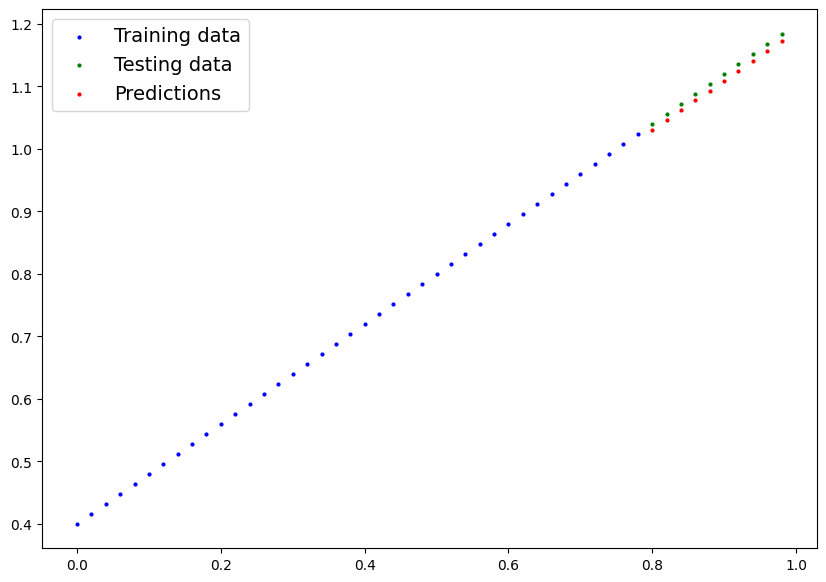

In [76]:
# Check out our model predictions visually
plot_predictions(predictions = y_preds_new.cpu())

### 6.5 Saving and Loading a trained model

**Path('models'):** This creates a Path object representing the directory named "models". The Path class is used to manipulate filesystem paths in an object-oriented way.

**MODEL_PATH.mkdir(parents=True, exist_ok=True):** This line creates the directory specified by the Path object (MODEL_PATH). Here's what the arguments mean:

* **parents=True:** This flag ensures that if any of the parent directories of "models" don't exist, they will be created recursively. For example, if the parent directory of "models" doesn't exist, it will be created along with "models".

* **exist_ok=True:** This flag specifies whether the mkdir() operation should succeed if the directory already exists. When set to True, it allows the operation to proceed without raising an error if the directory already exists.

In [86]:
# Saving our pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True) # see if the dir exists.

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict()
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [87]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [88]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [90]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds_new == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])